In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from gensim import corpora
from nltk.corpus import stopwords
import re
%matplotlib inline

In [2]:
trainDF=pd.read_csv("Data/train.csv")
testDF=pd.read_csv("Data/test.csv")

In [3]:
trainDF.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


## Combining Training and test data for simplicity

In [4]:
trainDF['data']='train'
testDF['data']='test'

In [7]:
frame = [trainDF,testDF]
df = pd.concat(frame,ignore_index = True)

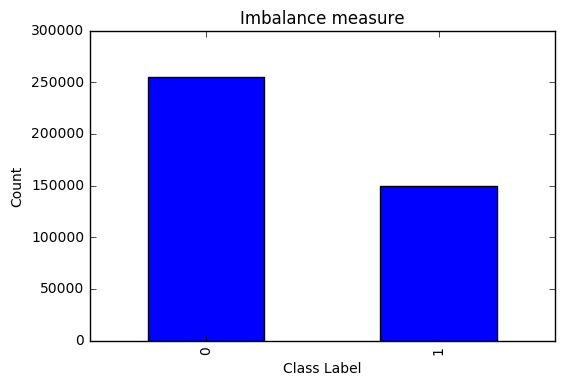

In [8]:
trainDF.is_duplicate.value_counts().plot(kind='bar',title='Imbalance measure')
plt.xlabel('Class Label')
plt.ylabel('Count')

In [ ]:
frame = [df.question1,df.question2]
stop = stopwords.words('english')
# stop=['my','i','the','for']
questions = pd.concat(frame,ignore_index = True)
questions=questions.str.lower()
questions=questions.apply(lambda x: [item for item in x if item not in stop])


In [ ]:
questions

In [9]:
def cleanQuestions(question):
    
    question=re.sub(r'[\s]+', ' ', question,flags=re.MULTILINE)
    return question

In [10]:
questions=questions.apply(cleanQuestions)
questions=questions.str.split()

TypeError: expected string or buffer

In [22]:
questions=list(questions)
questionsions

[['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  'in',
  'india?'],
 ['what', 'is', 'the', 'story', 'of', 'kohinoor', '(koh-i-noor)', 'diamond?'],
 ['how',
  'can',
  'i',
  'increase',
  'the',
  'speed',
  'of',
  'my',
  'internet',
  'connection',
  'while',
  'using',
  'a',
  'vpn?'],
 ['why',
  'am',
  'i',
  'mentally',
  'very',
  'lonely?',
  'how',
  'can',
  'i',
  'solve',
  'it?'],
 ['which',
  'one',
  'dissolve',
  'in',
  'water',
  'quikly',
  'sugar,',
  'salt,',
  'methane',
  'and',
  'carbon',
  'di',
  'oxide?'],
 ['astrology:',
  'i',
  'am',
  'a',
  'capricorn',
  'sun',
  'cap',
  'moon',
  'and',
  'cap',
  'rising...what',
  'does',
  'that',
  'say',
  'about',
  'me?'],
 ['should', 'i', 'buy', 'tiago?'],
 ['how', 'can', 'i', 'be', 'a', 'good', 'geologist?'],
 ['when',
  'do',
  'you',
  'use',
  '\xe3\x82\xb7',
  'instead',
  'of',
  '\xe3\x81\x97?'],
 ['motorola',
  '(company):',
  'ca

In [21]:
dictionary=corpora.Dictionary(questions)
dictionary.save('/Models/dict.dict')


TypeError: 'float' object is not iterable